# Importing all the necessary libraries

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix

# Loading the data

In [62]:
data = pd.read_csv('adult 3.csv')

# Understanding the data

In [65]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [67]:
data.shape

(48842, 14)

In [69]:
data.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


# Handling missing values and grouping low frequency categories

In [72]:
data.isna()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [76]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [78]:
data['workclass'] = data['workclass'].replace({'?' : 'Others'})

In [80]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [82]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [84]:
data['education'] = data['education'].replace(['1st-4th', 'Preschool'], 'Low-education')

In [86]:
data.education.value_counts()

education
HS-grad          15784
Some-college     10878
Bachelors         8025
Masters           2657
Assoc-voc         2061
11th              1812
Assoc-acdm        1601
10th              1389
7th-8th            955
Prof-school        834
9th                756
12th               657
Doctorate          594
5th-6th            509
Low-education      330
Name: count, dtype: int64

In [88]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [90]:
data['occupation'] = data['occupation'].replace({'?' : 'Miscellaneous'})

In [92]:
data['occupation'] = data['occupation'].replace(['Protective-serv', 'Priv-house-serv', 'Armed-Forces'], 'Other')

In [94]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Miscellaneous        2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Other                1240
Name: count, dtype: int64

In [96]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [98]:
data['native-country'] = data['native-country'].replace({'?' : 'Unknown'})

In [100]:
data['native-country'] = data['native-country'].replace(['Unknown', 'Hungary', 'Holand-Netherlands'], 'Other')

In [102]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Other                           877
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

# Visualizing the relationship between predictor features and the target variable

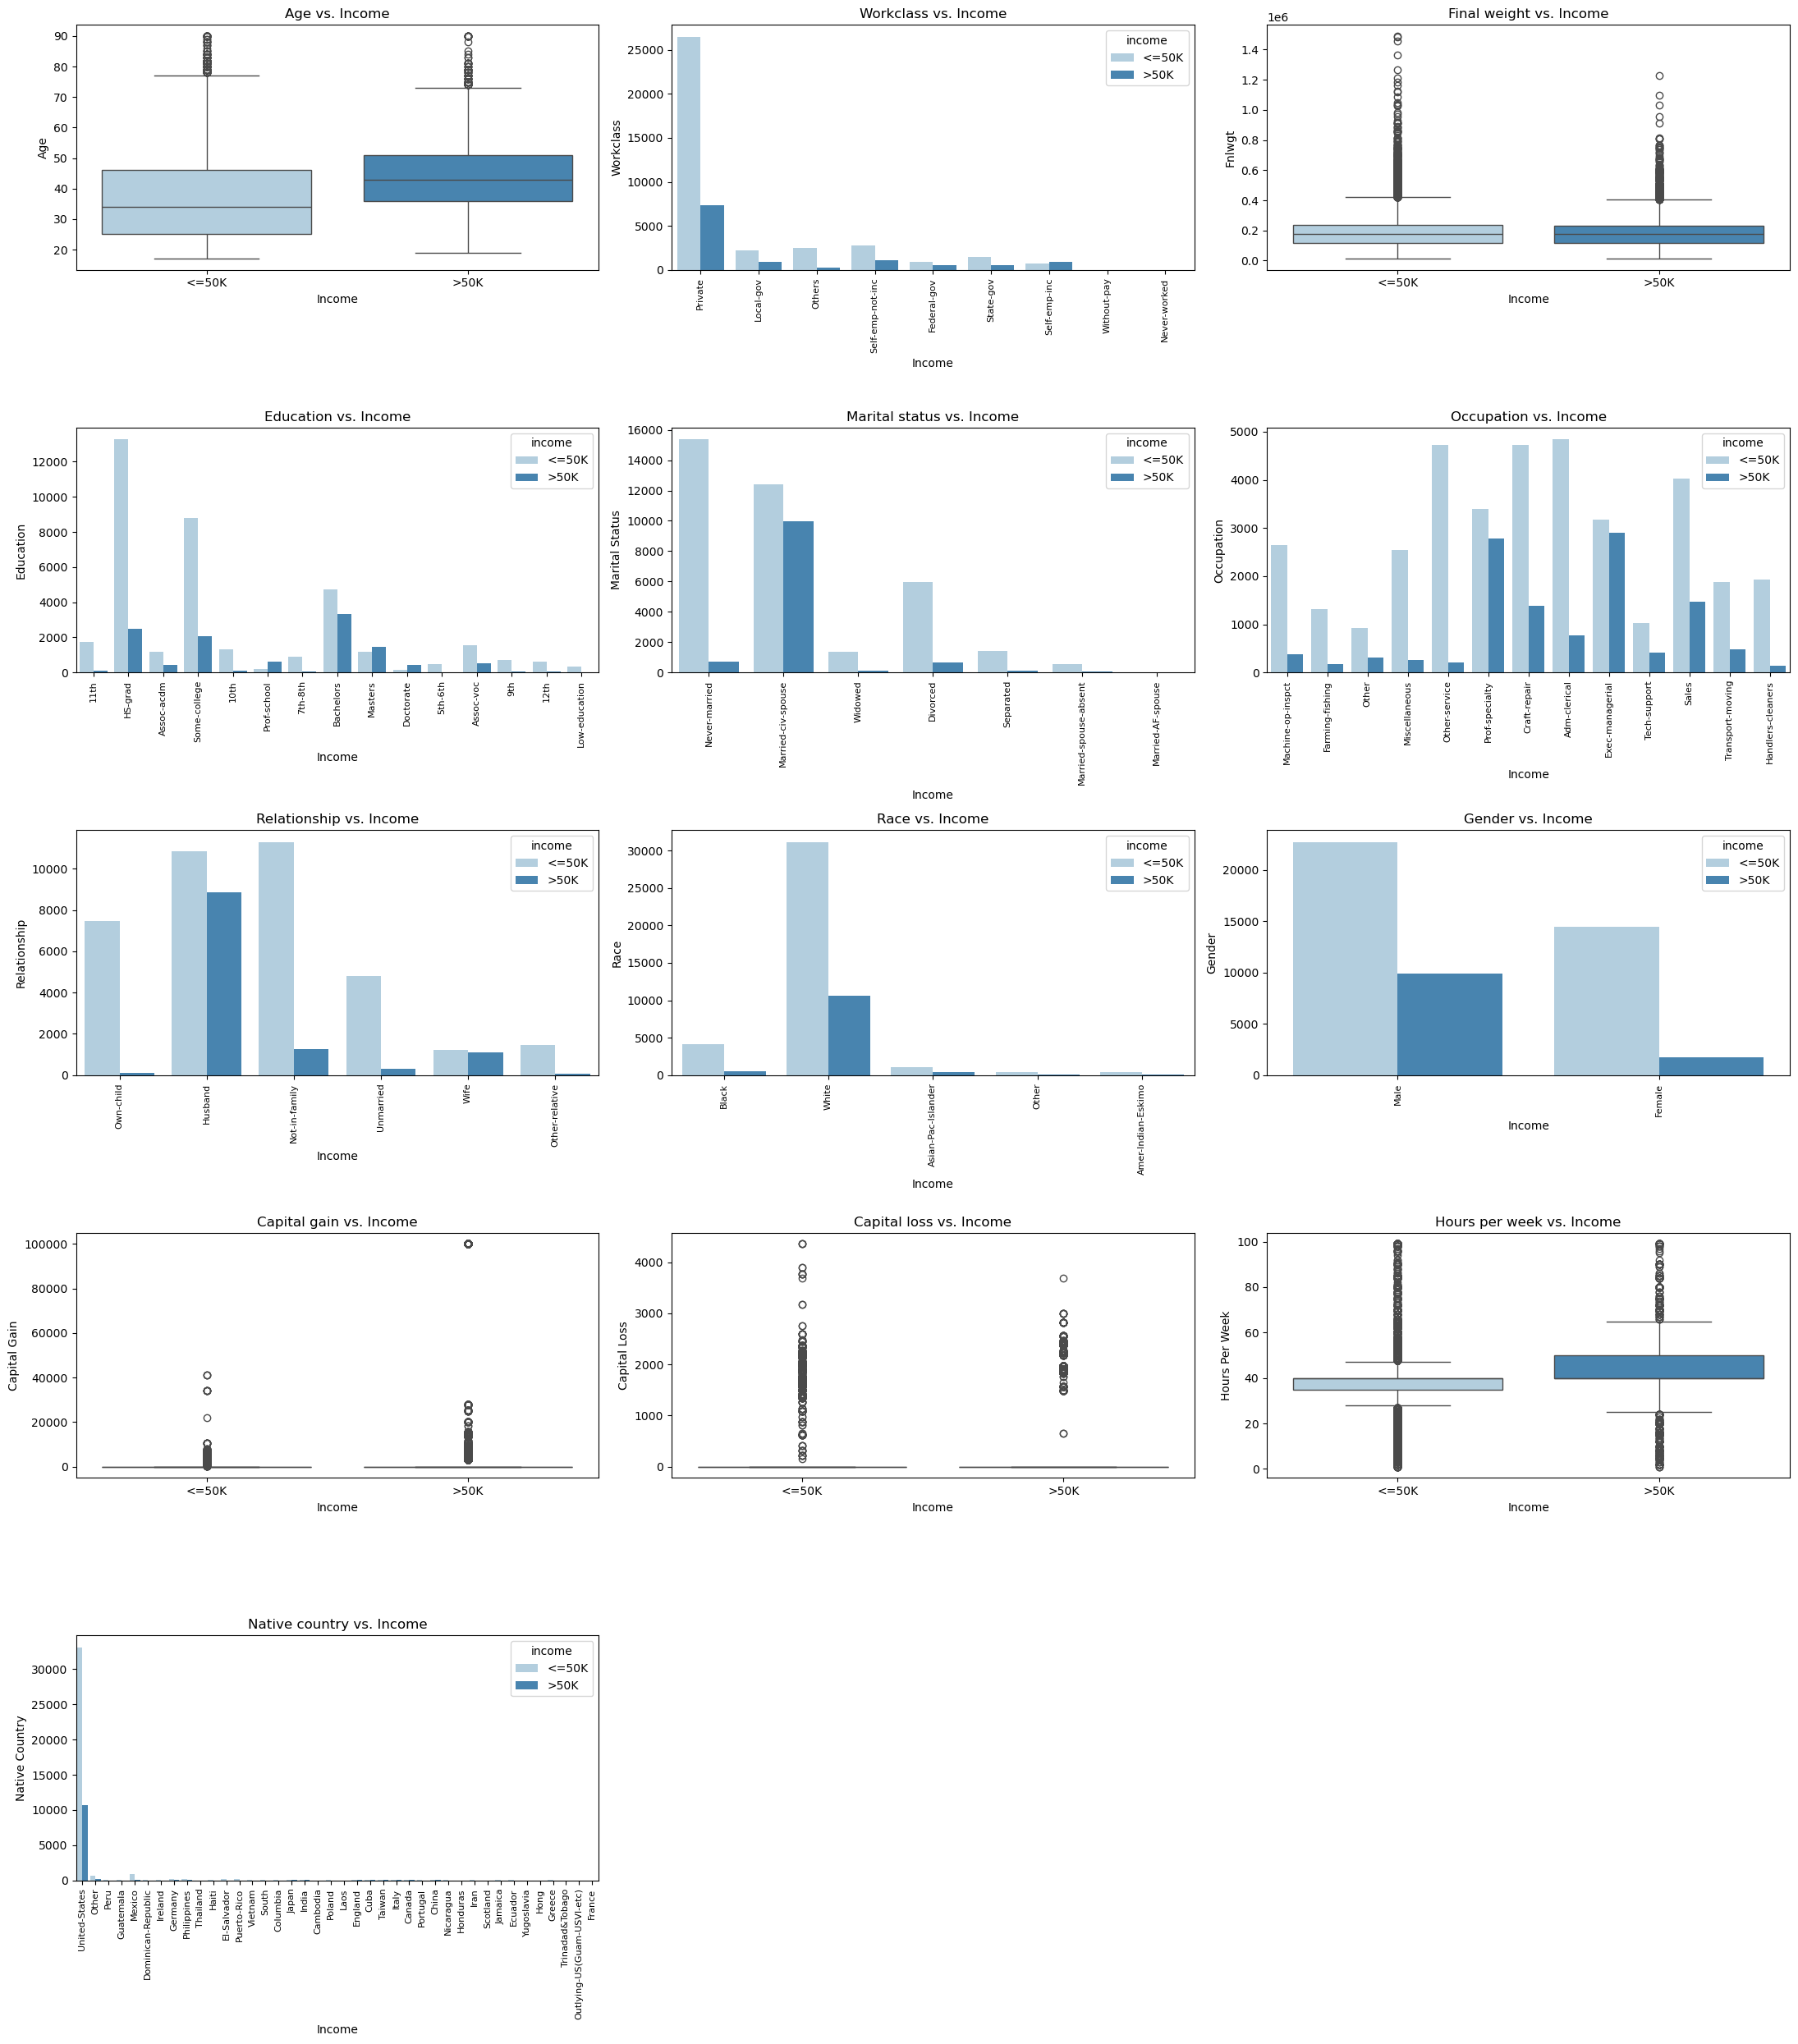

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(22, 25))
axes = axes.flatten()
plot_details = [
    ('box', 'age', 'Age vs. Income'),
    ('count', 'workclass', 'Workclass vs. Income'),
    ('box', 'fnlwgt', 'Final weight vs. Income'),
    ('count', 'education', 'Education vs. Income'),
    ('count', 'marital-status', 'Marital status vs. Income'),
    ('count', 'occupation', 'Occupation vs. Income'),
    ('count', 'relationship', 'Relationship vs. Income'),
    ('count', 'race', 'Race vs. Income'),
    ('count', 'gender', 'Gender vs. Income'),
    ('box', 'capital-gain', 'Capital gain vs. Income'),
    ('box', 'capital-loss', 'Capital loss vs. Income'),
    ('box', 'hours-per-week', 'Hours per week vs. Income'),
    ('count', 'native-country', 'Native country vs. Income')
]
for i, (plot_type, feature, title) in enumerate(plot_details):
    ax = axes[i]
    if plot_type == 'box':
        sns.boxplot(data = data, x = 'income', y = feature, hue = 'income', palette = 'Blues', ax = ax, legend = False)
        ax.set_xlabel('Income')
        ax.set_ylabel(feature.replace('-', ' ').title())
    else:
        sns.countplot(data = data, x = feature, hue = 'income', palette = 'Blues', ax = ax)
        ax.set_xlabel('Income')
        ax.set_ylabel(feature.replace('-', ' ').title())
        ticks = ax.get_xticks()
        labels = ax.get_xticklabels()
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels, rotation = 90, fontsize = 8)
    ax.set_title(title)
for j in range(len(plot_details), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Encoding categorical data into numerical data

In [108]:
encoder = LabelEncoder()
data['workclass'] = encoder.fit_transform(data['workclass'])
data['education'] = encoder.fit_transform(data['education'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])

In [110]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,5,3,2,1,0,0,40,37,<=50K
1,38,4,89814,10,2,3,0,4,1,0,0,50,37,<=50K
2,28,1,336951,6,2,7,0,4,1,0,0,40,37,>50K
3,44,4,160323,14,2,5,0,2,1,7688,0,40,37,>50K
4,18,3,103497,14,4,6,3,4,0,0,0,30,37,<=50K


# Understanding the correlation among features

In [113]:
c = data.copy()
c['income'] = encoder.fit_transform(c['income'])

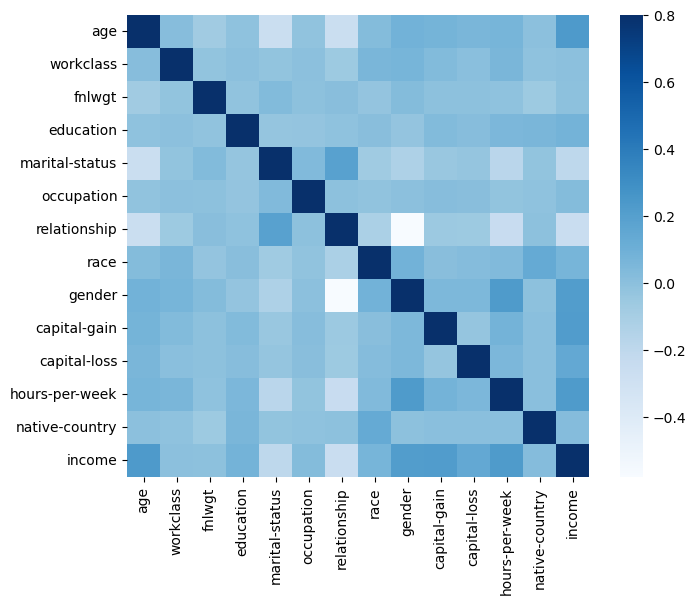

In [115]:
corrmat = c.corr()
fig = plt.figure(figsize = (8, 6))
sns.heatmap(corrmat, vmax = .8, square = True, cmap = 'Blues')
plt.show()

# Splitting predictor features and target feature

In [118]:
x = data.drop(columns = ['income'])
y = data['income']

# Normalizing the data

In [121]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.10958904, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.94871795],
       [0.28767123, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.94871795],
       [0.15068493, 0.125     , 0.21964867, ..., 0.        , 0.39795918,
        0.94871795],
       ...,
       [0.56164384, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.94871795],
       [0.06849315, 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.94871795],
       [0.47945205, 0.625     , 0.18648211, ..., 0.        , 0.39795918,
        0.94871795]])

# Removing outliers

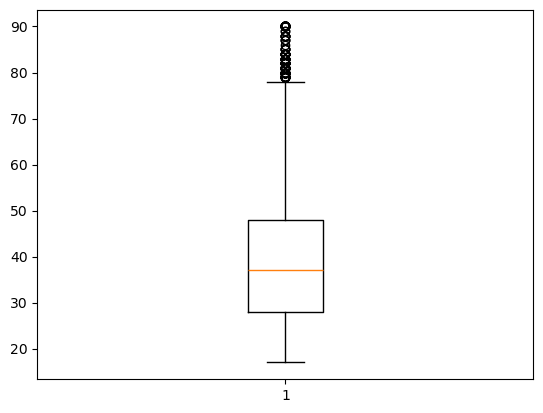

In [124]:
plt.boxplot(data['age'])
plt.show()

In [126]:
data=data[(data['age'] <= 75)]

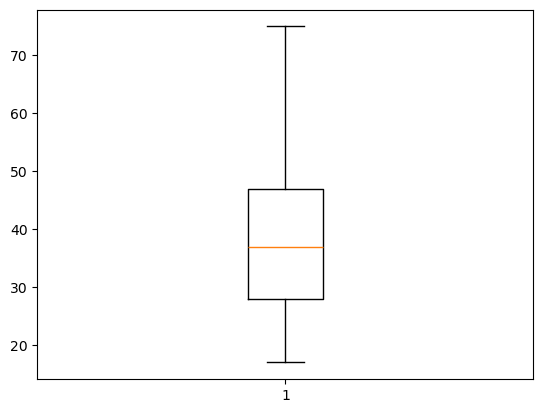

In [128]:
plt.boxplot(data['age'])
plt.show()

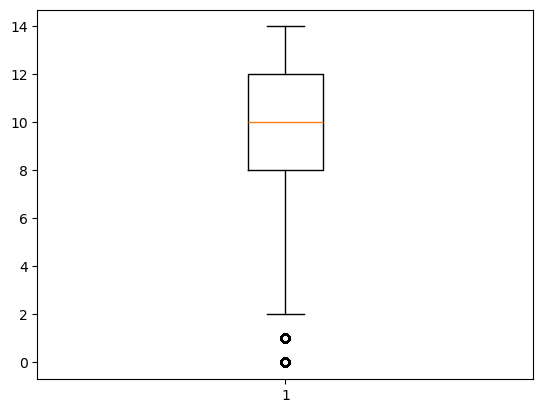

In [130]:
plt.boxplot(data['education'])
plt.show()

In [132]:
data=data[(data['education'] >= 2)]

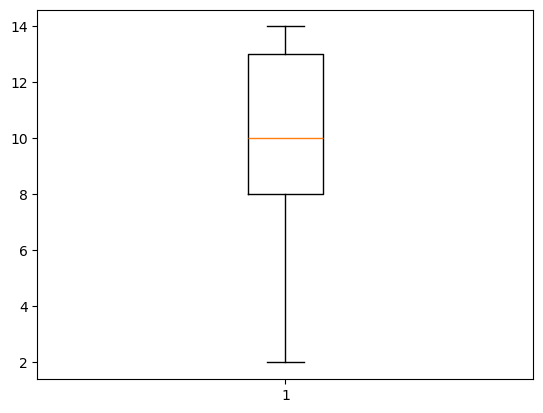

In [134]:
plt.boxplot(data['education'])
plt.show()

# Bifurcating the data into test and train data

In [137]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 23, stratify = y)

In [139]:
ytrain = encoder.fit_transform(ytrain)
ytest = encoder.fit_transform(ytest)

# Building a XGBoost Classifier

In [142]:
xgb_model = XGBClassifier()
xgb_model.fit(xtrain, ytrain)
predict = xgb_model.predict(xtest)
predict

array([0, 0, 0, ..., 0, 0, 1])

In [144]:
ytest = encoder.inverse_transform(ytest)
predict = encoder.inverse_transform(predict)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

# Evaluating the classifier

In [147]:
print('The model used is XGBoost')
accuracy = accuracy_score(ytest, predict)
print('The accuracy is {}'.format(accuracy))
print("\nDetailed Classification Report:")
print(classification_report(ytest, predict))
MCC = matthews_corrcoef(ytest, predict)
print('\nThe Matthews correlation coefficient is {}'.format(MCC))

The model used is XGBoost
The accuracy is 0.8777766403930801

Detailed Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7431
        >50K       0.79      0.67      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769


The Matthews correlation coefficient is 0.6498016517500692


# Visualizing the Confusion Matrix

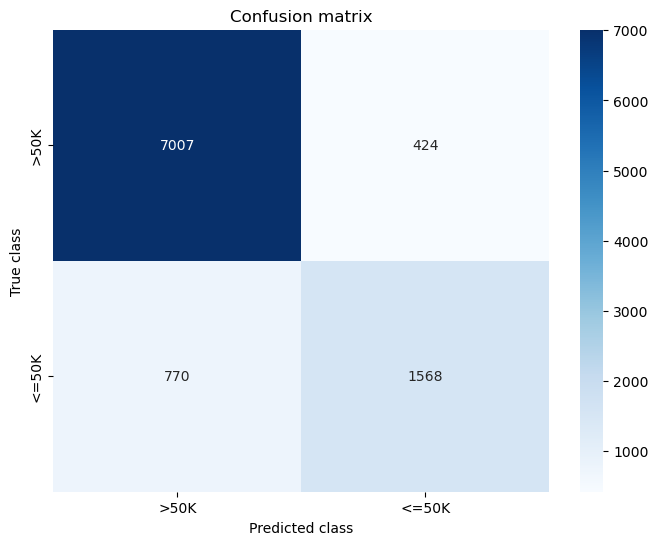

In [150]:
labels = ['>50K', '<=50K']
conf_matrix = confusion_matrix(ytest, predict)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ='d', cmap = 'Blues');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()